<a href="https://colab.research.google.com/github/Edudeiko/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/SP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [0]:
# Loading the data
sp = pd.read_csv('Sexual_Predator.csv')
print(sp.shape)
sp.head()

(1333, 35)


,X,Y,OBJECTID,KEY_,ADDRESS,FNAME,MNAME,LNAME,SNAME,STATUS,SUB_TYPD,RACE_TYPD,SEX,EYE_TYPD,HAIR_TYPD,HEIGHT,ADDR_TYPD,WEIGHT,DOB,DOC_NBR,ADDRESS2,CITY,TRAN_DATE,TRAN_ADDR1,TRAN_ADDR2,TRAN_CITY,TRAN_STATE,TRAN_ZIP5,TRAN_ZIP4,TRAN_CNTY,IMAGE_ID,ZIP,ZIP4,X_COORD,Y_COORD
0,-80.408765,25.645433,1,33,13270 SW 131st St Ste 133 ...,Gary,Louis,Becerra,NaN,Released - Subject to Registration,Predator,W,M,Brown,Grey,5' 08'',NaN,147 lbs,07/21/1955,196409,NaN,Miami,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3002927,33186,5876,850940.348893,477257.705541
1,-80.217582,25.830717,2,92,1245 NW 60th St Apt 2 ...,Jeune,NaN,Smalls,NaN,Released - Subject to Registration,Predator,B,M,Brown,Black,5' 07'',NaN,185 lbs,11/14/1953,M03068,NaN,Miami,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2836954,33142,8221,913525.247175,544928.434388
2,-80.402877,25.527544,3,110,13020 SW 257th Ter Side ...,Eleazar,NaN,Camargo,NaN,Released - Subject to Registration,Predator,W,M,Brown,Black,5' 04'',NaN,190 lbs,09/22/1966,M04075,NaN,Homestead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2802026,33032,6949,853072.937939,434419.752218
3,-80.488951,25.450726,4,117,766 NW 3RD ST ...,Milton,Jerrell,Collier,Jr,Released - Subject to Registration,Predator,B,M,Brown,Black,6' 03'',NaN,350 lbs,06/19/1975,456446,NaN,FLORIDA CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2560812,33034,3233,824795.891272,406382.758206
4,-80.345146,25.890890,5,183,7521 W 30th Ln ...,Juan,NaN,Molina-Diaz,NaN,Released - Subject to Registration,Predator,W,M,Brown,Unknown/bald,5' 02'',NaN,172 lbs,08/08/1925,M01905,NaN,Hialeah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2278608,33018,5245,871455.873454,566569.810652


In [0]:
# Looking fo NaN values
sp.isna().sum().sort_values(ascending=False)

TRAN_ZIP4     1333
ADDR_TYPD     1333
TRAN_ADDR1    1332
TRAN_CNTY     1332
TRAN_ZIP5     1332
TRAN_STATE    1332
TRAN_CITY     1332
TRAN_ADDR2    1332
TRAN_DATE     1332
ADDRESS2      1312
SNAME         1291
MNAME          588
DOC_NBR        139
FNAME            0
STATUS           0
LNAME            0
Y_COORD          0
ADDRESS          0
RACE_TYPD        0
KEY_             0
OBJECTID         0
Y                0
SUB_TYPD         0
WEIGHT           0
SEX              0
EYE_TYPD         0
HAIR_TYPD        0
HEIGHT           0
X_COORD          0
DOB              0
CITY             0
IMAGE_ID         0
ZIP              0
ZIP4             0
X                0
dtype: int64

In [0]:
# Dropping columns
sp = sp.drop(columns=['FNAME', 'MNAME', 'LNAME', 'SNAME', 'ADDR_TYPD', 'ADDRESS2',
                      'IMAGE_ID', 'ADDRESS', 'DOC_NBR', 'X_COORD', 'Y_COORD', 
                      'ZIP4', ])
sp.head()

,X,Y,OBJECTID,KEY_,STATUS,SUB_TYPD,RACE_TYPD,SEX,EYE_TYPD,HAIR_TYPD,HEIGHT,WEIGHT,DOB,CITY,TRAN_DATE,TRAN_ADDR1,TRAN_ADDR2,TRAN_CITY,TRAN_STATE,TRAN_ZIP5,TRAN_ZIP4,TRAN_CNTY,ZIP
0,-80.408765,25.645433,1,33,Released - Subject to Registration,Predator,W,M,Brown,Grey,5' 08'',147 lbs,07/21/1955,Miami,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33186
1,-80.217582,25.830717,2,92,Released - Subject to Registration,Predator,B,M,Brown,Black,5' 07'',185 lbs,11/14/1953,Miami,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33142
2,-80.402877,25.527544,3,110,Released - Subject to Registration,Predator,W,M,Brown,Black,5' 04'',190 lbs,09/22/1966,Homestead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33032
3,-80.488951,25.450726,4,117,Released - Subject to Registration,Predator,B,M,Brown,Black,6' 03'',350 lbs,06/19/1975,FLORIDA CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33034
4,-80.345146,25.890890,5,183,Released - Subject to Registration,Predator,W,M,Brown,Unknown/bald,5' 02'',172 lbs,08/08/1925,Hialeah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33018


In [0]:
# Dropping TRAN_ columns
TRAN_cols = [col for col in sp.columns if col.startswith('TRAN_')]
TRAN_cols

['TRAN_DATE',
 'TRAN_ADDR1',
 'TRAN_ADDR2',
 'TRAN_CITY',
 'TRAN_STATE',
 'TRAN_ZIP5',
 'TRAN_ZIP4',
 'TRAN_CNTY']

In [0]:
sp = sp.drop(columns=TRAN_cols)

In [0]:
sp.shape

(1333, 15)

In [0]:
# Let's see what I ended up with
sp.describe(exclude='number').T

,count,unique,top,freq
STATUS,1333,4,Released - Subject to Registration,1029
SUB_TYPD,1333,3,Offender,1160
RACE_TYPD,1333,5,W,882
SEX,1333,2,M,1315
EYE_TYPD,1333,8,Brown,1125
HAIR_TYPD,1333,8,Black,755
HEIGHT,1333,23,5' 09'',179
WEIGHT,1333,163,200 lbs,71
DOB,1333,1280,08/11/1980,3
CITY,1333,42,Miami,532


In [0]:
# that's the final result
sp.sample(3)

,X,Y,OBJECTID,KEY_,STATUS,SUB_TYPD,RACE_TYPD,SEX,EYE_TYPD,HAIR_TYPD,HEIGHT,WEIGHT,DOB,CITY,ZIP
1087,-80.388286,25.611339,1088,89776,Released - Subject to Registration,Offender,W,M,Brown,Black,5' 05'',145 lbs,12/26/1959,Miami,33177
1292,-80.481563,25.602297,1293,110994,Supervised - FL Dept of Corrections,Offender,W,M,Brown,Black,5' 09'',220 lbs,01/09/1985,Miami,33187
511,-80.265331,25.827935,512,35994,Released - Subject to Registration,Offender,W,M,Brown,Black,5' 07'',145 lbs,11/14/1940,HIALEAH,33010


In [0]:
# Double check the NaN values
sp.isna().sum()

X            0
Y            0
OBJECTID     0
KEY_         0
STATUS       0
SUB_TYPD     0
RACE_TYPD    0
SEX          0
EYE_TYPD     0
HAIR_TYPD    0
HEIGHT       0
WEIGHT       0
DOB          0
CITY         0
ZIP          0
dtype: int64

In [0]:
# Let's prepare the rest of the data
sp.rename(columns={'WEIGHT':'WEIGHT(lbs)'}, inplace=True)
sp.sample(2)

,X,Y,OBJECTID,KEY_,STATUS,SUB_TYPD,RACE_TYPD,SEX,EYE_TYPD,HAIR_TYPD,HEIGHT,WEIGHT(lbs),DOB,CITY,ZIP
285,-80.199142,25.832937,286,19039,Released - Subject to Registration,Offender,W,M,Brown,Black,5' 07'',180 lbs,03/01/1969,MIAMI,33150
370,-80.377330,25.560004,371,27080,Released - Subject to Registration,Offender,B,M,Brown,Black,5' 08'',200 lbs,12/18/1975,MIAMI,33170


In [0]:
# Now I removed lbs from Weight columns and transform it from string to integer
def remove_lbs_to_int(string):
  return int(string.strip('lbs'))

In [0]:
remove_lbs_to_int('190 lbs')

190

In [0]:
sp['WEIGHT(lbs)'] = sp['WEIGHT(lbs)'].apply(remove_lbs_to_int)

In [0]:
sp.sample(2)

,X,Y,OBJECTID,KEY_,STATUS,SUB_TYPD,RACE_TYPD,SEX,EYE_TYPD,HAIR_TYPD,HEIGHT,WEIGHT(lbs),DOB,CITY,ZIP
1081,-80.191917,25.849118,1082,89212,Released - Subject to Registration,Offender,W,M,Blue,Brown,6' 00'',175,01/17/1973,Miami,33138
471,-80.309933,25.731945,472,33793,Released - Subject to Registration,Offender,W,M,Brown,Brown,5' 07'',205,01/26/1976,Miami,33155


In [0]:
# Same goes for HEIGHT
sp['HEIGHT'] = (
   sp['HEIGHT']
    .str.replace("'",''))
sp.sample(2)

,X,Y,OBJECTID,KEY_,STATUS,SUB_TYPD,RACE_TYPD,SEX,EYE_TYPD,HAIR_TYPD,HEIGHT,WEIGHT(lbs),DOB,CITY,ZIP
739,-80.343825,25.605838,740,49639,Released - Subject to Registration,Offender,W,M,Brown,Black,6 00,190,10/16/1950,Palmetto Bay,33157
851,-80.212785,25.892577,852,61489,Released - Subject to Registration,Offender,B,M,Brown,Black,5 06,146,01/09/1976,North Miami,33168


In [0]:
sp['HEIGHT'] = sp['HEIGHT'].str.replace('[: ]','.')
sp.sample(2)

,X,Y,OBJECTID,KEY_,STATUS,SUB_TYPD,RACE_TYPD,SEX,EYE_TYPD,HAIR_TYPD,HEIGHT,WEIGHT(lbs),DOB,CITY,ZIP
628,-80.302157,25.933703,629,42083,Released - Subject to Registration,Offender,B,M,Brown,Black,5.10,200,05/26/1972,HIALEAH,33015
873,-80.445085,25.486780,874,63085,Supervised - FL Dept of Corrections,Offender,W,M,Brown,Unknown/bald,5.11,260,05/17/1962,Homestead,33033


In [0]:
sp['HEIGHT'] = sp['HEIGHT'].astype(float)

In [0]:
sp.dtypes

X              float64
Y              float64
OBJECTID         int64
KEY_             int64
STATUS          object
SUB_TYPD        object
RACE_TYPD       object
SEX             object
EYE_TYPD        object
HAIR_TYPD       object
HEIGHT         float64
WEIGHT(lbs)      int64
DOB             object
CITY            object
ZIP              int64
dtype: object

In [0]:
# Another approach
def heights(h):
  
  #what to remove
  remove = ["'",'"']
  
  #goes though each character in h and adds it to height less whats removed
  height =  [x for x in h if x not in remove]
  
  #combine the characters in height and cast as an int
  return int(height[0] + height[2] + height[3])

In [0]:
sp['HEIGHT'].apply(heights).value_counts()

In [0]:
sp['HEIGHT'] = sp['HEIGHT'].apply(heights)

In [0]:
sp.shape

(1333, 15)

In [0]:
sp.rename(columns={'HEIGHT':'HEIGHT(f)'}, inplace=True)
sp.sample(2)

,X,Y,OBJECTID,KEY_,STATUS,SUB_TYPD,RACE_TYPD,SEX,EYE_TYPD,HAIR_TYPD,HEIGHT(f),WEIGHT(lbs),DOB,CITY,ZIP
1077,-80.510281,25.581659,1078,89056,Released - Subject to Registration,Offender,W,M,Brown,Brown,5.09,165,11/08/1949,Miami,33187
1218,-80.490569,25.754769,1219,104030,Released - Subject to Registration,Offender,W,M,Brown,Black,5.00,145,05/15/1962,MIAMI,33194


In [0]:
# Sample size to small 
sp['SEX'].str.contains('M').value_counts()

True     1315
False      18
Name: SEX, dtype: int64

In [0]:
# Chenged DOB to datetime format
sp['DOB'] = pd.to_datetime(sp['DOB'], infer_datetime_format=True)
sp['DOB'] = sp['DOB'].dt.year
# sp = sp.set_index('DOB')

In [0]:
sp.dtypes

X              float64
Y              float64
OBJECTID         int64
KEY_             int64
STATUS          object
SUB_TYPD        object
RACE_TYPD       object
SEX             object
EYE_TYPD        object
HAIR_TYPD       object
HEIGHT(f)      float64
WEIGHT(lbs)      int64
DOB              int64
CITY            object
ZIP              int64
dtype: object

In [0]:
# sp['DOB'] = pd.to_numeric(sp['DOB'])

In [0]:
# Now I can explore the data
# I will be looking at DOB, Weight, Height to see if there is any correlation
# between SUB_TYPD (offender and predator)
sp['DOB'].value_counts()

1968    44
1963    43
1974    43
1962    41
1958    40
        ..
2000     1
1998     1
1992     1
1995     1
1923     1
Name: DOB, Length: 73, dtype: int64

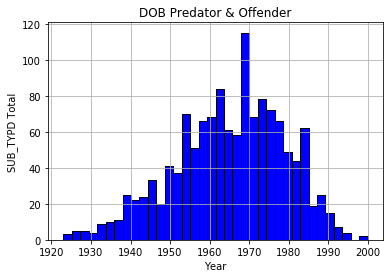

In [0]:
# matplotlib histogram
plt.hist(sp['DOB'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(sp['DOB'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('DOB Predator & Offender')
plt.xlabel('Year')
plt.ylabel('SUB_TYPD Total')
plt.grid(True)

In [0]:
sp['WEIGHT(lbs)'].value_counts()

200    71
180    69
170    52
185    52
190    52
       ..
221     1
219     1
211     1
209     1
82      1
Name: WEIGHT(lbs), Length: 163, dtype: int64

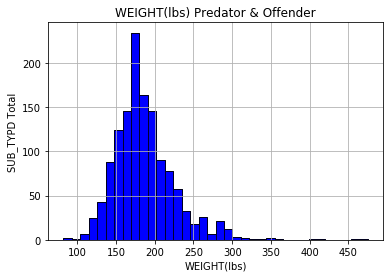

In [0]:
plt.hist(sp['WEIGHT(lbs)'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

sns.distplot(sp['WEIGHT(lbs)'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('WEIGHT(lbs) Predator & Offender')
plt.xlabel('WEIGHT(lbs)')
plt.ylabel('SUB_TYPD Total')
plt.grid(True)

In [0]:
sp['HEIGHT(f)'].value_counts()

5.09    179
5.08    172
5.10    146
5.06    140
5.07    135
5.11    126
6.00    100
5.05     74
6.01     63
5.04     48
6.02     44
5.03     28
5.02     17
6.04     15
6.03     15
5.00     14
6.05      4
5.01      3
4.11      3
6.06      2
4.08      2
6.07      2
4.10      1
Name: HEIGHT(f), dtype: int64

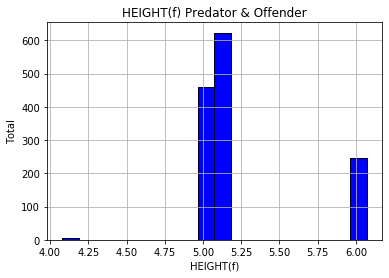

In [0]:
plt.hist(sp['HEIGHT(f)'], color = 'blue', edgecolor = 'black',
         bins = int(180/10))

sns.distplot(sp['HEIGHT(f)'], hist=True, kde=False, 
             bins=int(180/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('HEIGHT(f) Predator & Offender')
plt.xlabel('HEIGHT(f)')
plt.ylabel('Total')
plt.grid(True)

In [0]:
sp.sample(3)

,X,Y,OBJECTID,KEY_,STATUS,SUB_TYPD,RACE_TYPD,SEX,EYE_TYPD,HAIR_TYPD,HEIGHT(f),WEIGHT(lbs),DOB,CITY,ZIP
168,-80.201427,25.768167,169,5489,Released - Subject to Registration,Offender,W,M,Brown,Brown,5.09,210,1967,Miami,33130
215,-80.437677,25.691798,216,9088,Released - Subject to Registration,Offender,W,M,Brown,Grey,5.11,218,1958,Miami,33193
1219,-80.530579,25.403750,1220,104039,Supervised - US Probation,Offender,W,M,Brown,Brown,5.05,150,1959,Florida City,33034


In [0]:
# Now I separate the data into two data sets
sp['SUB_TYPD'].value_counts()

Offender                         1160
Predator                          171
Juvenile Sex Offender (Walsh)       2
Name: SUB_TYPD, dtype: int64

In [0]:
sp_offender = sp[sp['SUB_TYPD'] != 'Predator']
sp_predator = sp[sp['SUB_TYPD'] == 'Predator']

In [0]:
sp_offender.shape, sp_predator.shape

((1162, 15), (171, 15))

In [0]:
sp_offender.describe(include='all')

,X,Y,OBJECTID,KEY_,STATUS,SUB_TYPD,RACE_TYPD,SEX,EYE_TYPD,HAIR_TYPD,HEIGHT(f),WEIGHT(lbs),DOB,CITY,ZIP
count,1162.000000,1162.000000,1162.000000,1162.000000,1162,1162,1162,1162,1162,1162,1162.000000,1162.000000,1162.00000,1162,1162.000000
unique,NaN,NaN,NaN,NaN,4,2,5,2,8,8,NaN,NaN,NaN,41,NaN
top,NaN,NaN,NaN,NaN,Released - Subject to Registration,Offender,W,M,Brown,Black,NaN,NaN,NaN,Miami,NaN
freq,NaN,NaN,NaN,NaN,928,1160,762,1144,972,659,NaN,NaN,NaN,459,NaN
mean,-80.316113,25.757676,665.718589,50326.537866,NaN,NaN,NaN,NaN,NaN,NaN,5.254639,186.895869,1965.45611,NaN,33123.878657
std,0.108967,0.150606,388.435104,34444.879734,NaN,NaN,NaN,NaN,NaN,NaN,0.380565,39.867161,13.65378,NaN,60.519726
min,-80.555932,25.403750,11.000000,1053.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.080000,82.000000,1925.00000,NaN,33010.000000
25%,-80.401765,25.627181,330.250000,22933.750000,NaN,NaN,NaN,NaN,NaN,NaN,5.070000,160.000000,1957.00000,NaN,33055.000000
50%,-80.283540,25.789870,661.500000,43271.500000,NaN,NaN,NaN,NaN,NaN,NaN,5.090000,180.000000,1967.00000,NaN,33147.000000
75%,-80.226141,25.872365,1006.750000,80994.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.110000,205.000000,1975.00000,NaN,33169.000000


In [0]:
sp_predator.describe(include='all')

,X,Y,OBJECTID,KEY_,STATUS,SUB_TYPD,RACE_TYPD,SEX,EYE_TYPD,HAIR_TYPD,HEIGHT(f),WEIGHT(lbs),DOB,CITY,ZIP
count,171.000000,171.000000,171.000000,171.000000,171,171,171,171,171,171,171.00000,171.000000,171.000000,171,171.000000
unique,NaN,NaN,NaN,NaN,3,1,3,1,7,6,NaN,NaN,NaN,20,NaN
top,NaN,NaN,NaN,NaN,Released - Subject to Registration,Predator,W,M,Brown,Black,NaN,NaN,NaN,Miami,NaN
freq,NaN,NaN,NaN,NaN,101,171,120,171,153,96,NaN,NaN,NaN,73,NaN
mean,-80.305643,25.779533,675.707602,50813.877193,NaN,NaN,NaN,NaN,NaN,NaN,5.17386,187.245614,1962.111111,NaN,33119.941520
std,0.112396,0.154377,361.320807,31134.675698,NaN,NaN,NaN,NaN,NaN,NaN,0.29045,40.475823,15.916490,NaN,60.740306
min,-80.552931,25.427868,1.000000,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.00000,114.000000,1923.000000,NaN,33010.000000
25%,-80.385456,25.630302,403.500000,30161.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.06000,162.000000,1952.500000,NaN,33054.500000
50%,-80.257621,25.835494,707.000000,46719.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.08000,182.000000,1962.000000,NaN,33142.000000
75%,-80.226349,25.898213,969.500000,77279.500000,NaN,NaN,NaN,NaN,NaN,NaN,5.10000,200.000000,1975.000000,NaN,33168.000000


In [0]:
sp_predator.describe(exclude='number').T

,count,unique,top,freq
STATUS,171,3,Released - Subject to Registration,101
SUB_TYPD,171,1,Predator,171
RACE_TYPD,171,3,W,120
SEX,171,1,M,171
EYE_TYPD,171,7,Brown,153
HAIR_TYPD,171,6,Black,96
CITY,171,20,Miami,73


In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

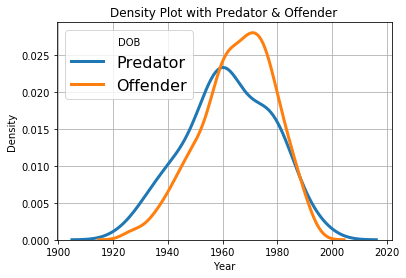

In [0]:
# List of two sub_types to plot
sex_predators = ['Predator', 'Offender']

# Iterate through the two sub_types
for sex_predator in sex_predators:
    # Subset to the SUB_TYPE
    subset = sp[sp['SUB_TYPD'] == sex_predator]
    
    # Draw the density plot
    sns.distplot(subset['DOB'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = sex_predator)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'DOB')
plt.title('Density Plot with Predator & Offender')
plt.xlabel('Year')
plt.ylabel('Density')
plt.grid(True)

In [0]:
# we can reject the null hypothesis of equal averages P<0.01
ttest_ind(sp_offender['DOB'], sp_predator['DOB'])

Ttest_indResult(statistic=2.924801560184627, pvalue=0.003505144185552153)

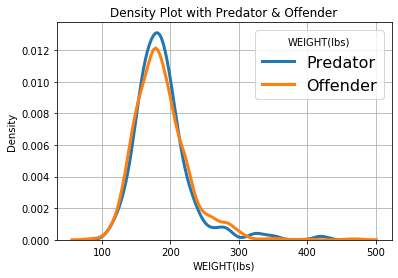

In [0]:
sex_predators = ['Predator', 'Offender']

for sex_predator in sex_predators:
    # Subset to the SUB_TYPE
    subset = sp[sp['SUB_TYPD'] == sex_predator]
    
    # Draw the density plot
    sns.distplot(subset['WEIGHT(lbs)'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = sex_predator)
    
plt.legend(prop={'size': 16}, title = 'WEIGHT(lbs)')
plt.title('Density Plot with Predator & Offender')
plt.xlabel('WEIGHT(lbs)')
plt.ylabel('Density')
plt.grid(True)

In [0]:
# we can NOT reject the null hypothesis of equal averages P>0.01
ttest_ind(sp_offender['WEIGHT(lbs)'], sp_predator['WEIGHT(lbs)'])

Ttest_indResult(statistic=-0.10689820042837661, pvalue=0.9148858504526294)

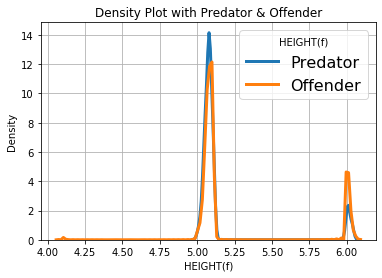

In [0]:
sex_predators = ['Predator', 'Offender']

for sex_predator in sex_predators:
    # Subset to the SUB_TYPE
    subset = sp[sp['SUB_TYPD'] == sex_predator]
    
    # Draw the density plot
    sns.distplot(subset['HEIGHT(f)'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = sex_predator)
    
plt.legend(prop={'size': 16}, title = 'HEIGHT(f)')
plt.title('Density Plot with Predator & Offender')
plt.xlabel('HEIGHT(f)')
plt.ylabel('Density')
plt.grid(True)

In [0]:
# we can reject the null hypothesis of equal averages P<0.01
ttest_ind(sp_offender['HEIGHT(f)'], sp_predator['HEIGHT(f)'])

Ttest_indResult(statistic=2.663515468741881, pvalue=0.007826203833102494)

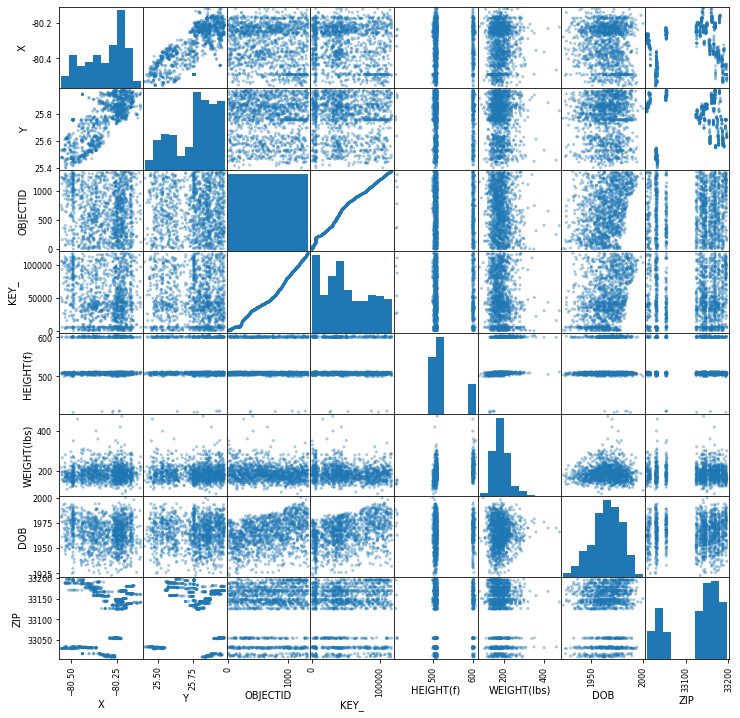

In [0]:
pd.plotting.scatter_matrix(sp, alpha=0.4, figsize=((12,12)));

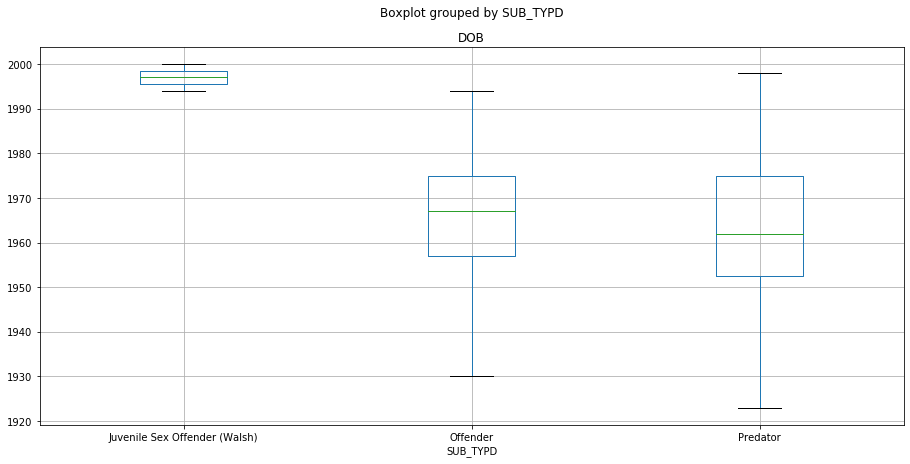

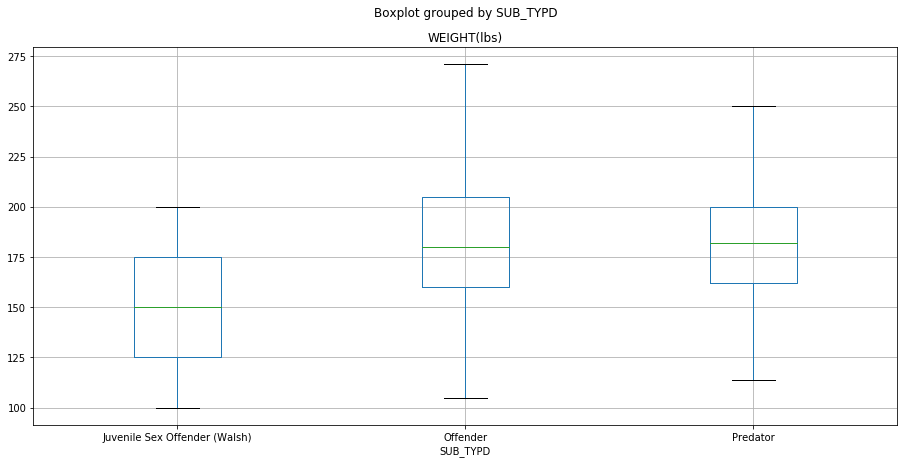

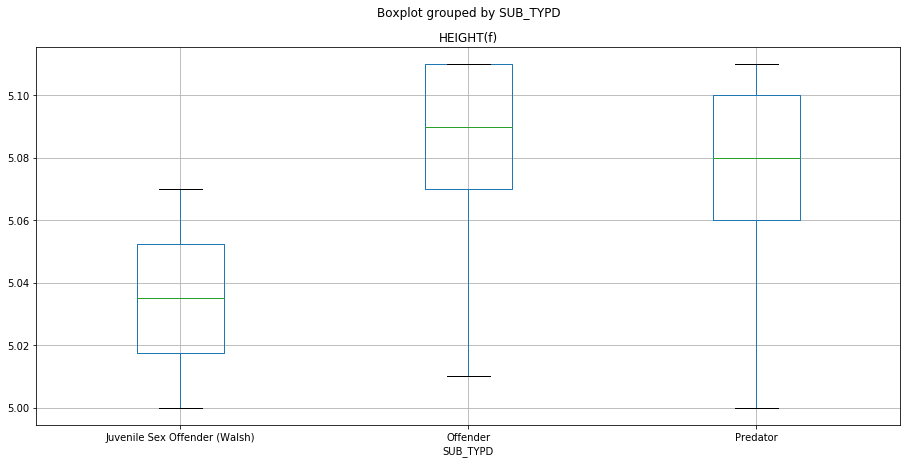

In [0]:
cols = ['DOB', 'WEIGHT(lbs)', 'HEIGHT(f)']
boxplots = [sp.boxplot(column=col, by='SUB_TYPD', showfliers=False, figsize=((15,7))) for col in cols]

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n-1)
  interval = stderr * t
  return (mean, mean-interval, mean+interval)

In [0]:
import numpy as np
from scipy import stats
from matplotlib import style

In [0]:
confidence_interval(sp_offender['DOB'])

(1965.4561101549054, 1964.6702397562094, 1966.2419805536015)

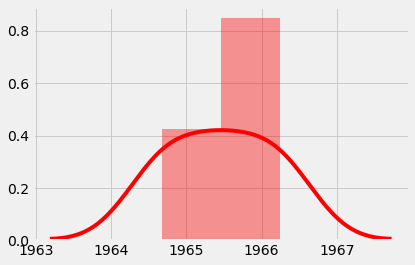

In [0]:
style.use('fivethirtyeight')
sns.distplot(confidence_interval(sp_offender['DOB']), color='r');

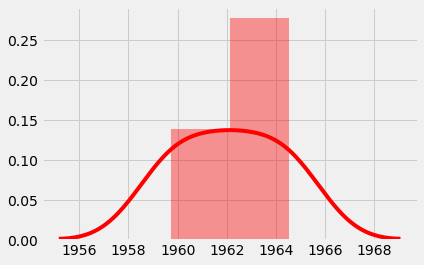

In [0]:
style.use('fivethirtyeight')
sns.distplot(confidence_interval(sp_predator['DOB']), color='r');

In [0]:
confidence_interval(sp_predator['DOB'])

(1962.111111111111, 1959.7084082907475, 1964.5138139314747)

In [0]:
sp.dtypes

X              float64
Y              float64
OBJECTID         int64
KEY_             int64
STATUS          object
SUB_TYPD        object
RACE_TYPD       object
SEX             object
EYE_TYPD        object
HAIR_TYPD       object
HEIGHT(f)      float64
WEIGHT(lbs)      int64
DOB              int64
CITY            object
ZIP              int64
dtype: object

In [0]:
# With the help of Chi square test we can explore the categorical features
# of the data that relevant to offender, predator
categorical_features = [sp.STATUS, sp.RACE_TYPD, sp.SEX, sp.EYE_TYPD, 
                        sp.HAIR_TYPD]
crosstabs = [pd.crosstab(sp['SUB_TYPD'], feature) for feature in categorical_features]
crosstabs[0]

STATUS,Confinement,Released - Subject to Registration,Supervised - FL Dept of Corrections,Supervised - US Probation
SUB_TYPD,,,,
Juvenile Sex Offender (Walsh),0,2,0,0
Offender,37,926,167,30
Predator,6,101,64,0


In [0]:
from scipy.stats import chi2_contingency

In [0]:
for crosstab in crosstabs:
  print(crosstab)
  chi2 = (chi2_contingency(crosstab, correction=False)) # No Yates correction
  print('Chi-square statistic: {}'.format(chi2[0]))
  print('p-value: {}'.format(chi2[1]))
  print('\n\n')

STATUS                         Confinement  ...  Supervised - US Probation
SUB_TYPD                                    ...                           
Juvenile Sex Offender (Walsh)            0  ...                          0
Offender                                37  ...                         30
Predator                                 6  ...                          0

[3 rows x 4 columns]
Chi-square statistic: 59.004591057752286
p-value: 7.168320895017433e-11



RACE_TYPD                      A    B  I  U    W
SUB_TYPD                                        
Juvenile Sex Offender (Walsh)  0    1  0  0    1
Offender                       2  388  2  7  761
Predator                       1   50  0  0  120
Chi-square statistic: 4.001441208024032
p-value: 0.8569934062148936



SEX                             F     M
SUB_TYPD                               
Juvenile Sex Offender (Walsh)   0     2
Offender                       18  1142
Predator                        0   171
Chi-square s

In [0]:
# Chi square confirmes that the HAIR_TYPD has a significant difference between 
# SUB_TYPD (offender & predator)

In [0]:
# Let's use folium to see the last known predator's locations
sp_SUB_TYPD_predator = sp_predator[sp_predator['SUB_TYPD'] == 'Predator']

In [0]:
sp_SUB_TYPD_predator.sample(3)

,X,Y,OBJECTID,KEY_,STATUS,SUB_TYPD,RACE_TYPD,SEX,EYE_TYPD,HAIR_TYPD,HEIGHT(f),WEIGHT(lbs),DOB,CITY,ZIP
845,-80.501974,25.427868,846,60308,Supervised - FL Dept of Corrections,Predator,W,M,Brown,Grey,5.09,160,1961,Homestead,33034
898,-80.289128,25.861455,899,66966,Released - Subject to Registration,Predator,W,M,Brown,Brown,5.09,200,1967,Hialeah,33012
917,-80.241050,25.801404,918,69114,Released - Subject to Registration,Predator,W,M,Brown,Brown,5.07,282,1949,Miami,33142


In [0]:
import folium

In [0]:
locations_list = list(zip(sp_predator['Y'], sp_predator['X']))
len(locations_list)

171

In [0]:
folium_map = folium.Map(location=[25.761681,  -80.191788], zoom_start=12)
for point in locations_list[:170]:
  folium.Marker(point).add_to(folium_map)

In [0]:
folium_map